In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [3]:
df_ghg = pd.read_csv("./Data/UK_LA_GHG_EMISSIONS.csv")
df_gdp = pd.read_csv("./Data/GDP_by_LA.csv", skiprows=1, thousands=",")

In [4]:
df_merged = df_ghg.merge(df_gdp, how="inner", left_on="Local Authority Code", right_on="LA code")
df_merged

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,7069,7385,7277,7333,7501,7585,8055,8331,7961,8363
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,7069,7385,7277,7333,7501,7585,8055,8331,7961,8363
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,...,7069,7385,7277,7333,7501,7585,8055,8331,7961,8363
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,...,7069,7385,7277,7333,7501,7585,8055,8331,7961,8363
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,...,7069,7385,7277,7333,7501,7585,8055,8331,7961,8363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467083,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Transport,Transport 'Other',...,3105,3270,3217,3285,3322,3390,3586,3774,3628,3925
467084,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Landfill,...,3105,3270,3217,3285,3322,3390,3586,3774,3628,3925
467085,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',...,3105,3270,3217,3285,3322,3390,3586,3774,3628,3925
467086,Wales,W92000004,Wales,W92000004,Wales,Wrexham,W06000006,2020,Waste management,Waste management 'Other',...,3105,3270,3217,3285,3322,3390,3586,3774,3628,3925


In [5]:
boolean_mask1 = (df_merged["LA GHG Sector"] == "Transport")
boolean_mask2 = (df_merged["LA GHG Sub-sector"] == "Road Transport (A roads)")
boolean_mask3 = (df_merged["Greenhouse gas"] == "CO2")

df_merged = df_merged[boolean_mask1 & boolean_mask2 & boolean_mask3]
df_merged.reset_index(inplace=True)

In [6]:
year_condition = (df_merged["Calendar Year"] == 2018)

df_merged_2018 = df_merged[year_condition]
df_merged_2018.reset_index(inplace=True)

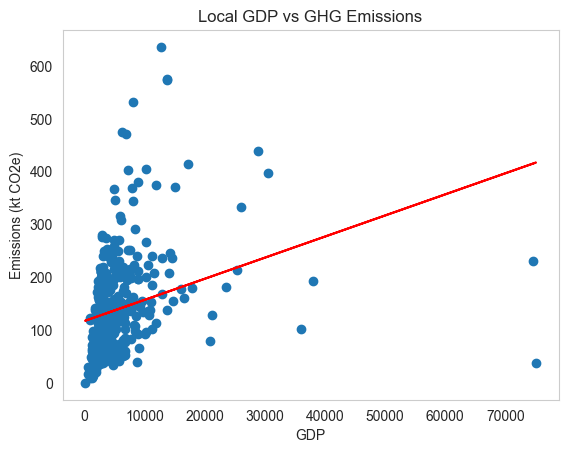

In [9]:
plt.scatter(list(df_merged_2018["2018"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

#TRENDLINE
z = np.polyfit(list(df_merged_2018["2018"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]), 1)
p = np.poly1d(z)
plt.plot(list(df_merged_2018["2018"]),p(list(df_merged_2018["2018"])),"r")

plt.xlabel("GDP")
plt.ylabel("Emissions (kt CO2e)")
plt.title("Local GDP vs GHG Emissions")
plt.grid(False)
plt.show()

In [26]:
df_merged_2018_without_london = df_merged_2018[df_merged_2018["Region"] != "London"]
df_merged_2018_only_london = df_merged_2018[df_merged_2018["Region"] == "London"]
scipy.stats.pearsonr(list(df_merged_2018["2018"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.2968139333616864, pvalue=4.818580767370661e-09)

In [34]:
scipy.stats.pearsonr(list(df_merged_2018_without_london["2018"]), list(df_merged_2018_without_london["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=0.544948300981374, pvalue=9.107727999809833e-28)

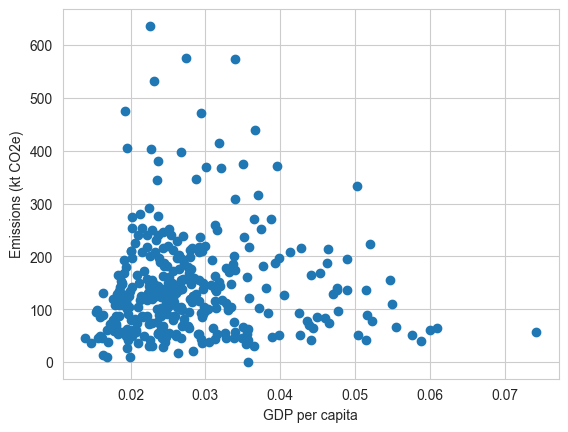

In [22]:
plt.scatter(list(df_merged_2018_without_london["2018"] / (1000 * df_merged_2018_without_london["Mid-year Population (thousands)"])), list(df_merged_2018_without_london["Territorial emissions (kt CO2e)"]))
plt.xlabel("GDP per capita")
plt.ylabel("Emissions (kt CO2e)")
plt.show()

In [35]:
#scipy.stats.pearsonr(list(df_merged_2018_without_london["2018"] / (1000 * df_merged_2018_without_london["Mid-year Population (thousands)"])), list(df_merged_2018_without_london["Territorial emissions (kt CO2e)"]))
scipy.stats.pearsonr(list(df_merged_2018["2018"] / (1000 * df_merged_2018["Mid-year Population (thousands)"])), list(df_merged_2018["Territorial emissions (kt CO2e)"]))

PearsonRResult(statistic=-0.05425169376694468, pvalue=0.2953594914447348)

In [33]:
df_merged_2018_without_london["2018"].mean()

4805.266862170088